**Installing Dependecies**

In [ ]:
# Install the library
!pip install pythae

**Using gpu if available**

In [ ]:
import torch
import torchvision.datasets as datasets

device = "cuda" if torch.cuda.is_available() else "cpu"

# %load_ext autoreload
# %autoreload 2

**Loading dataset, selecting specified split of dataset classes(i.e. no. of images from each class to keep) and defining split between train and eval data after random shuffling**

In [ ]:
import numpy as np
cifar10_trainset = datasets.CIFAR10(root='../../data', train=True, download=True, transform=None)

data = np.array(cifar10_trainset.data)
labels = np.array(cifar10_trainset.targets)
selected_classes = ['cat', 'dog', 'horse', 'deer', 'bird']
selected_class_indices = [cifar10_trainset.class_to_idx[c] for c in selected_classes]

class_counts = {
    'cat': 2375,
    'dog': 2375,
    'horse': 2375,
    'deer': 2375,
    'bird': 500
}

selected_data = []
selected_labels = []

for cls_name in selected_classes:
    cls_idx = cifar10_trainset.class_to_idx[cls_name]
    cls_mask = labels == cls_idx
    cls_data = data[cls_mask]

    chosen_indices = np.random.choice(len(cls_data), class_counts[cls_name], replace=False)
    selected_data.append(cls_data[chosen_indices])
    selected_labels.append(np.full(class_counts[cls_name], cls_idx))

imbalanced_data = np.concatenate(selected_data)
imbalanced_labels = np.concatenate(selected_labels)

perm = np.random.permutation(len(imbalanced_data))
imbalanced_data = imbalanced_data[perm]
imbalanced_labels = imbalanced_labels[perm]

split_idx = int(0.8 * len(imbalanced_data))
train_dataset = imbalanced_data[:split_idx].transpose(0, 3, 1, 2) / 255.0
eval_dataset  = imbalanced_data[split_idx:].transpose(0, 3, 1, 2) / 255.0

print("Train set size:", len(train_dataset))
print("Eval set size:", len(eval_dataset))

from collections import Counter
print("\nFinal training distribution:")
print(Counter(imbalanced_labels[:split_idx]))
print("Final eval distribution:")
print(Counter(imbalanced_labels[split_idx:]))


100%|██████████| 170M/170M [00:05<00:00, 32.8MB/s]


Train set size: 8000
Eval set size: 2000

Final training distribution:
Counter({np.int64(4): 1910, np.int64(7): 1904, np.int64(5): 1895, np.int64(3): 1887, np.int64(2): 404})
Final eval distribution:
Counter({np.int64(3): 488, np.int64(5): 480, np.int64(7): 471, np.int64(4): 465, np.int64(2): 96})


In [ ]:
from pythae.models import VAE, VAEConfig
from pythae.trainers import BaseTrainerConfig
from pythae.pipelines.training import TrainingPipeline
from pythae.models.nn.benchmarks.cifar import Encoder_ResNet_VAE_CIFAR, Decoder_ResNet_AE_CIFAR

**Model Configuration**

In [ ]:
config = BaseTrainerConfig(
    output_dir='my_model',
    learning_rate=1e-4,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_epochs=50,
    optimizer_cls="AdamW",
    optimizer_params={"weight_decay": 0.05, "betas": (0.91, 0.99)}
)


model_config = VAEConfig(
    input_dim=(3, 32, 32),
    latent_dim=16
)

model = VAE(
    model_config=model_config,
    encoder=Encoder_ResNet_VAE_CIFAR(model_config),
    decoder=Decoder_ResNet_AE_CIFAR(model_config)
)

In [ ]:
pipeline = TrainingPipeline(
    training_config=config,
    model=model
)

This code block trains the VAE using the train and eval datasets

In [ ]:
pipeline(
    train_data=train_dataset,
    eval_data=eval_dataset
)

Preprocessing train data...
INFO:pythae.pipelines.training:Preprocessing train data...
Checking train dataset...
INFO:pythae.pipelines.training:Checking train dataset...
Preprocessing eval data...

INFO:pythae.pipelines.training:Preprocessing eval data...

Checking eval dataset...
INFO:pythae.pipelines.training:Checking eval dataset...
Using Base Trainer

INFO:pythae.pipelines.training:Using Base Trainer

Model passed sanity check !
Ready for training.

INFO:pythae.trainers.base_trainer.base_trainer:Model passed sanity check !
Ready for training.

Created my_model folder since did not exist.

INFO:pythae.trainers.base_trainer.base_trainer:Created my_model folder since did not exist.

Created my_model/VAE_training_2025-11-10_16-31-44. 
Training config, checkpoints and final model will be saved here.

INFO:pythae.trainers.base_trainer.base_trainer:Created my_model/VAE_training_2025-11-10_16-31-44. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_

Training of epoch 1/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 1/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 85.7512
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 85.7512
Eval loss: 64.2296
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 64.2296
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 2/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 2/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 58.3599
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 58.3599
Eval loss: 54.4875
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 54.4875
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 3/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 3/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 53.2263
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 53.2263
Eval loss: 51.58
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 51.58
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 4/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 4/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 51.243
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 51.243
Eval loss: 50.1709
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 50.1709
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 5/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 5/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 50.195
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 50.195
Eval loss: 49.5236
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 49.5236
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 6/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 6/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 49.5167
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 49.5167
Eval loss: 49.1384
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 49.1384
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 7/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 7/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 48.9152
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 48.9152
Eval loss: 48.2348
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 48.2348
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 8/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 8/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 48.269
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 48.269
Eval loss: 47.7531
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.7531
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 9/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 9/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.8803
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.8803
Eval loss: 47.9231
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.9231
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 10/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 10/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.6741
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.6741
Eval loss: 47.5419
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.5419
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 11/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 11/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.4508
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.4508
Eval loss: 47.3461
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.3461
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 12/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 12/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.3102
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.3102
Eval loss: 47.0395
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.0395
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 13/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 13/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.137
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.137
Eval loss: 47.2132
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.2132
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 14/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 14/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 47.0169
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 47.0169
Eval loss: 46.6739
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.6739
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 15/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 15/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.9095
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.9095
Eval loss: 47.0082
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 47.0082
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 16/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 16/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.9136
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.9136
Eval loss: 46.9178
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.9178
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 17/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 17/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.7982
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.7982
Eval loss: 46.7536
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.7536
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 18/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 18/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.7315
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.7315
Eval loss: 46.447
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.447
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 19/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 19/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.7142
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.7142
Eval loss: 46.5644
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.5644
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 20/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 20/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.6908
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.6908
Eval loss: 46.5012
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.5012
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 21/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 21/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.6019
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.6019
Eval loss: 46.411
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.411
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 22/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 22/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.5845
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.5845
Eval loss: 46.7823
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.7823
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 23/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 23/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.5319
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.5319
Eval loss: 46.2986
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.2986
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 24/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 24/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.4057
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.4057
Eval loss: 46.3561
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.3561
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 25/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 25/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.432
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.432
Eval loss: 46.3655
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.3655
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 26/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 26/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.4626
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.4626
Eval loss: 46.235
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.235
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 27/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 27/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.2881
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.2881
Eval loss: 46.3965
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.3965
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 28/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 28/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.3063
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.3063
Eval loss: 46.1377
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.1377
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 29/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 29/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.3465
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.3465
Eval loss: 46.3695
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.3695
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 30/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 30/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.2629
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.2629
Eval loss: 46.2382
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.2382
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 31/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 31/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.2007
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.2007
Eval loss: 46.0832
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.0832
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 32/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 32/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.2104
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.2104
Eval loss: 46.1747
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.1747
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 33/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 33/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.2139
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.2139
Eval loss: 46.1987
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.1987
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 34/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 34/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.1316
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.1316
Eval loss: 46.0603
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.0603
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 35/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 35/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.0513
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.0513
Eval loss: 45.942
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.942
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 36/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 36/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.0186
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.0186
Eval loss: 45.9752
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.9752
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 37/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 37/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.0894
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.0894
Eval loss: 46.1334
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.1334
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 38/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 38/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.9832
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.9832
Eval loss: 46.0734
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.0734
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 39/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 39/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 46.0316
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 46.0316
Eval loss: 45.9602
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.9602
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 40/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 40/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.9703
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.9703
Eval loss: 46.0263
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.0263
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 41/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 41/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.9478
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.9478
Eval loss: 46.052
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.052
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 42/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 42/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.879
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.879
Eval loss: 46.1377
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.1377
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 43/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 43/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.9131
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.9131
Eval loss: 46.1665
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.1665
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 44/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 44/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.8929
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.8929
Eval loss: 45.9722
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.9722
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 45/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 45/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.8791
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.8791
Eval loss: 46.0227
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.0227
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 46/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 46/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.848
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.848
Eval loss: 46.0517
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 46.0517
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 47/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 47/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.841
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.841
Eval loss: 45.9474
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.9474
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 48/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 48/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.7275
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.7275
Eval loss: 45.8107
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.8107
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 49/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 49/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.7706
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.7706
Eval loss: 45.8385
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.8385
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 50/50:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 50/50:   0%|          | 0/32 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 45.7505
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 45.7505
Eval loss: 45.6882
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 45.6882
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Training ended!
INFO:pythae.trainers.base_trainer.base_trainer:Training ended!
Saved final model in my_model/VAE_training_2025-11-10_16-31-44/final_model
INFO:pythae.trainers.base_trainer.base_trainer:Saved final model in my_model/VAE_training_2025-11-10_16-31-44/final_model


In [ ]:
import os
from pythae.models import AutoModel

**Loading the trained model**

In [ ]:
last_training = sorted(os.listdir('my_model'))[-1]
trained_model = AutoModel.load_from_folder(os.path.join('my_model', last_training, 'final_model'))

In [ ]:
from pythae.samplers import NormalSampler

# Sampling from a standard normal or Gaussian Mixture for generating artifical images

**Sampling using normal sampler**

In [ ]:
# create normal sampler
normal_samper = NormalSampler(
    model=trained_model
)

In [ ]:
# sample
gen_data = normal_samper.sample(
    num_samples=25
)

In [ ]:
import matplotlib.pyplot as plt

**Normal Sampling generation results**

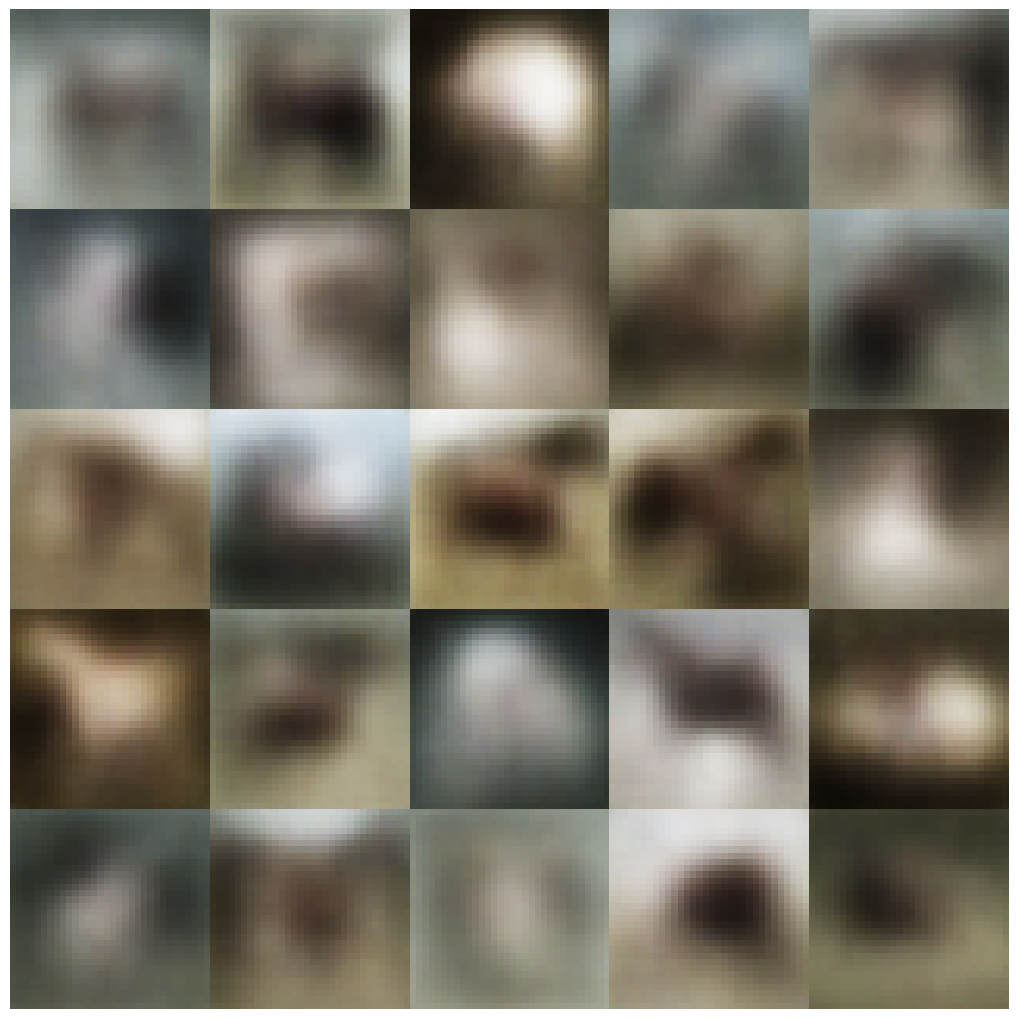

In [ ]:
# show results with normal sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        # Transpose the dimensions to (height, width, channels)
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0).permute(1, 2, 0))
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [ ]:
from pythae.samplers import GaussianMixtureSampler, GaussianMixtureSamplerConfig

**GMM sampling generation results**

In [ ]:
# set up GMM sampler config
gmm_sampler_config = GaussianMixtureSamplerConfig(
    n_components=10
)

# create gmm sampler
gmm_sampler = GaussianMixtureSampler(
    sampler_config=gmm_sampler_config,
    model=trained_model
)

# fit the sampler
gmm_sampler.fit(train_dataset)

In [ ]:
# sample
gen_data = gmm_sampler.sample(
    num_samples=25
)

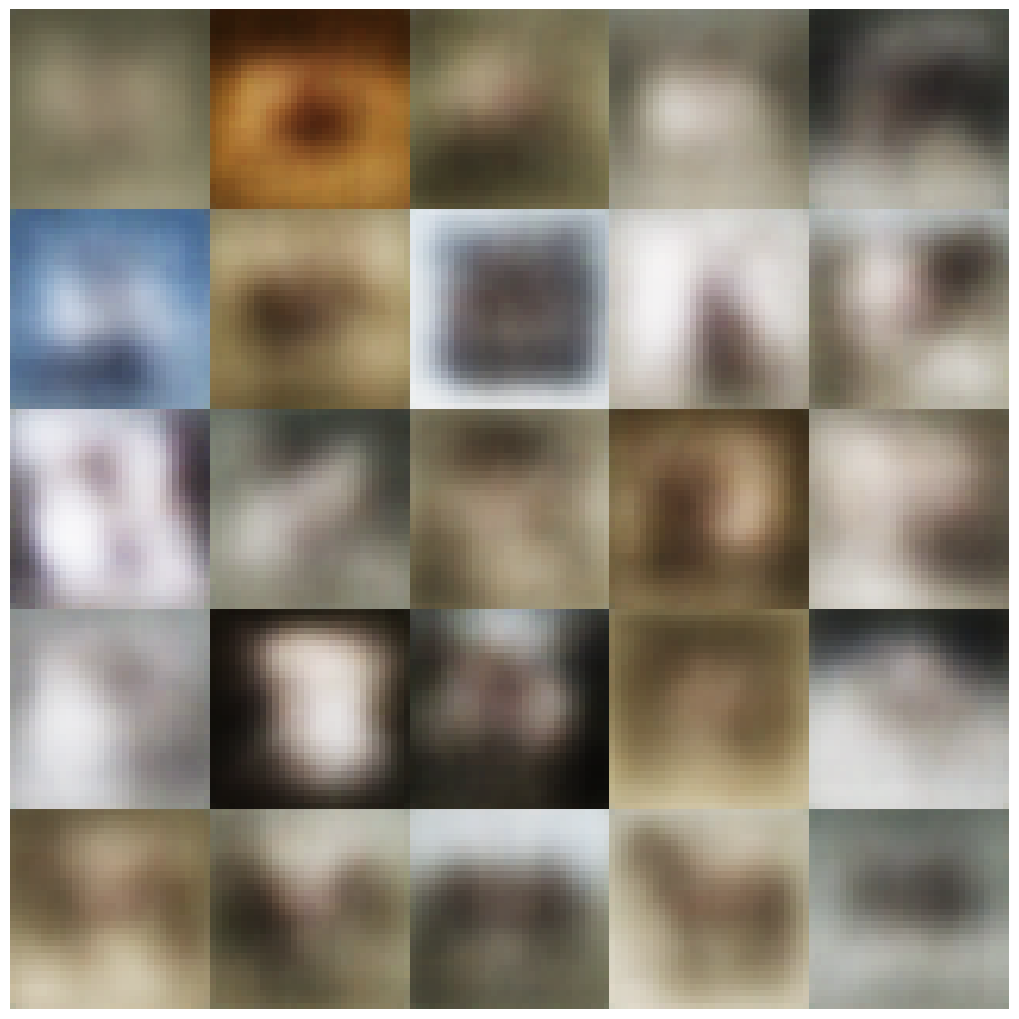

In [ ]:
# show results with gmm sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0).permute(1, 2, 0))
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

## ... the other samplers work the same

## Visualizing reconstructions

Here we are selecting data from the eval data and then passing it to the trained VAE architecture. After that, we compare the reconstruted data from the original data to see the quality of the reconstructed images

In [ ]:
reconstructions = trained_model.reconstruct(torch.from_numpy(eval_dataset[:25]).to(device).float()).detach().cpu()

**Original eval data points/images**

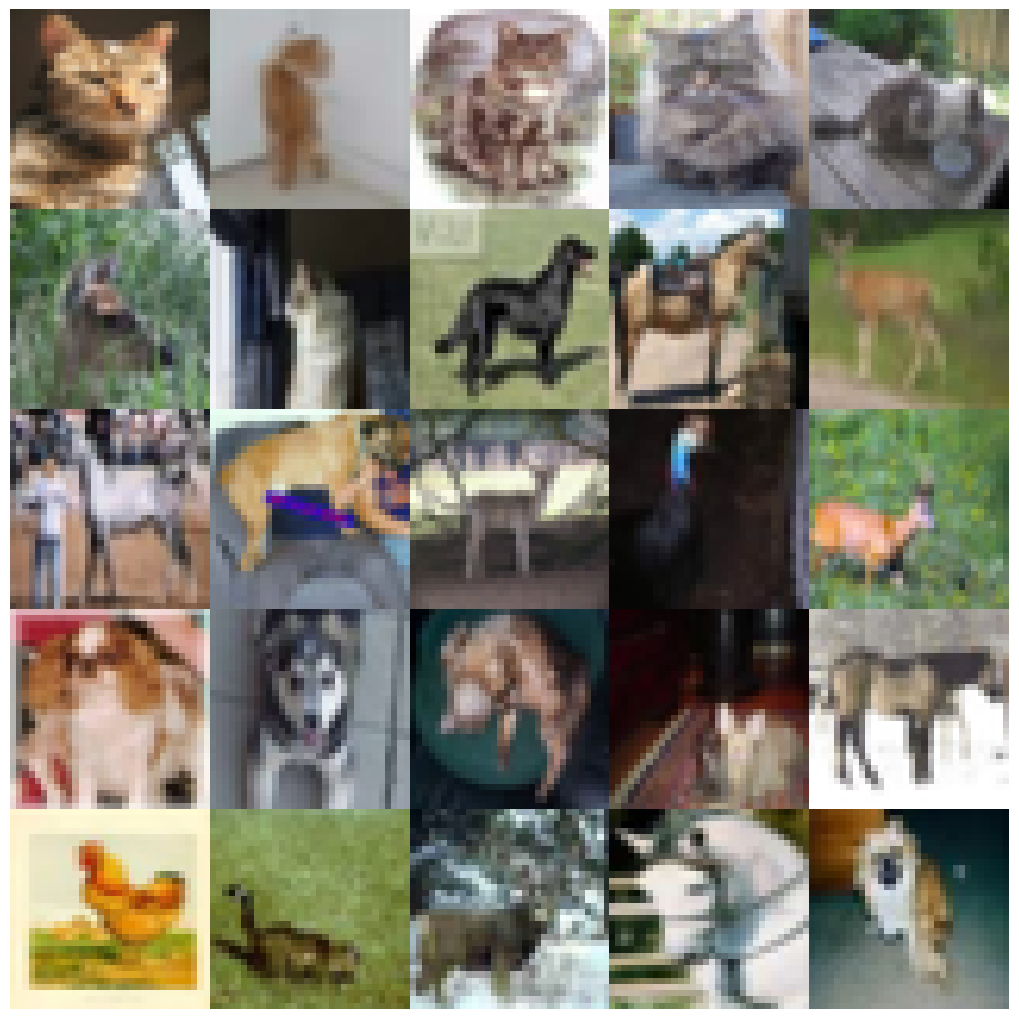

In [ ]:
# show original
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(eval_dataset[:25][i*5 + j].transpose(1, 2, 0))
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

**Reconstructed images**

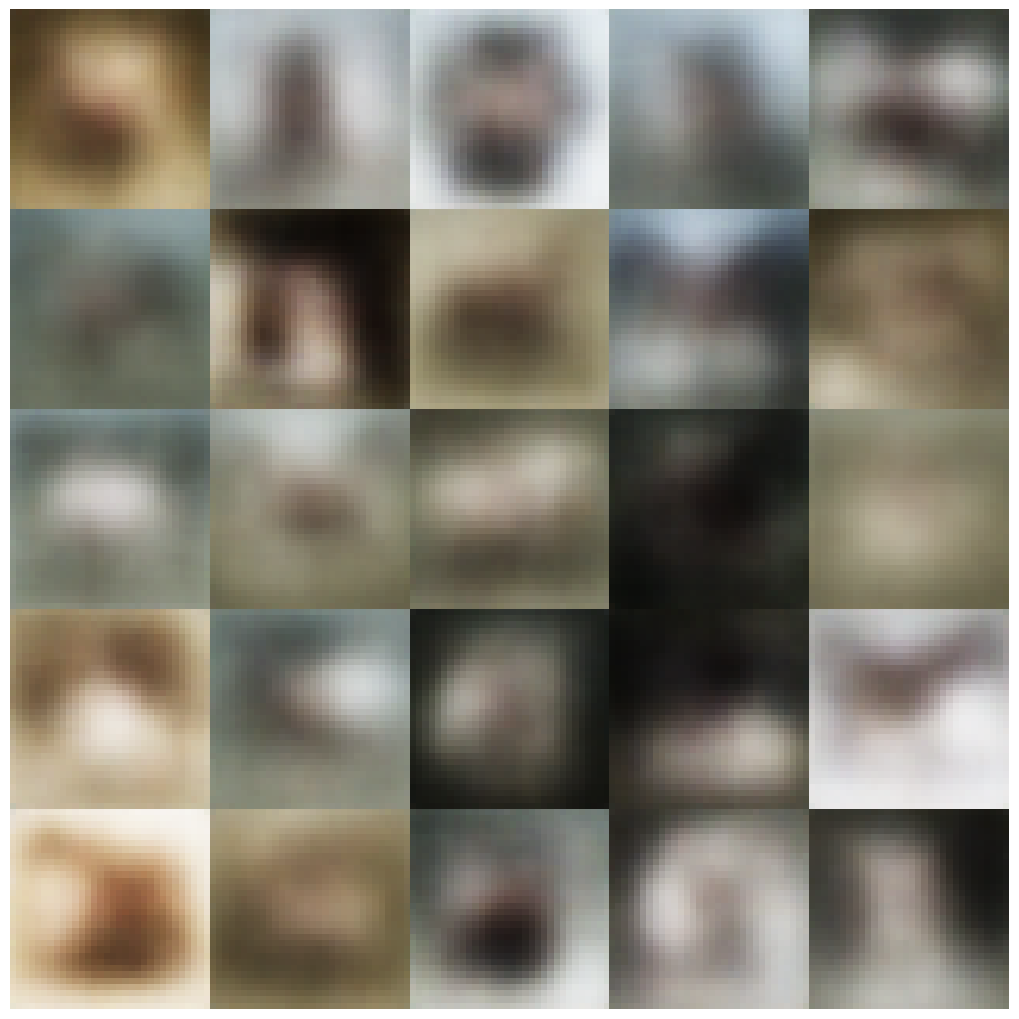

In [ ]:
# show reconstructions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(reconstructions[i*5 + j].cpu().squeeze(0).permute(1, 2, 0))
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

**FID and IS score**

In [ ]:
# Install torchmetrics with image dependencies if not already installed
%pip install torchmetrics[image]

import torch
from torchmetrics.image.fid import FrechetInceptionDistance
from torchmetrics.image.inception import InceptionScore
import torchvision.transforms as T

# Define a function to calculate FID
def calculate_fid(real_images, generated_images, device, batch_size=64):
    fid = FrechetInceptionDistance(feature=2048).to(device)
    # Ensure images are in the correct format (uint8 and C, H, W)
    real_images = (real_images * 255).byte()
    generated_images = (generated_images * 255).byte()

    for i in range(0, real_images.size(0), batch_size):
        fid.update(real_images[i:i+batch_size].to(device), real=True)
    for i in range(0, generated_images.size(0), batch_size):
        fid.update(generated_images[i:i+batch_size].to(device), real=False)

    return fid.compute()

# Define a function to calculate Inception Score
def calculate_is(images, device, batch_size=64):
    is_score = InceptionScore().to(device)
    # Ensure images are in the correct format (uint8 and C, H, W)
    images = (images * 255).byte()

    for i in range(0, images.size(0), batch_size):
        is_score.update(images[i:i+batch_size].to(device))

    return is_score.compute()

# Generate a larger number of samples for evaluation (e.g., 1000)
num_eval_samples = 1000
gen_data_eval = normal_samper.sample(
    num_samples=num_eval_samples
).cpu()

# Use a subset of the real training data for evaluation
real_data_eval = torch.from_numpy(train_dataset[torch.randperm(len(train_dataset))[:num_eval_samples]]).cpu()


# Calculate FID score
fid_score = calculate_fid(real_data_eval, gen_data_eval, device)
print(f"FID score: {fid_score.item()}")

# Calculate Inception Score
# Note: Inception Score usually requires a larger number of samples (e.g., 10,000) for reliable results
# We will use 1000 samples here for demonstration purposes
is_mean, is_std = calculate_is(gen_data_eval, device)
print(f"Inception Score (mean): {is_mean.item()}, (std): {is_std.item()}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 26.7 MB/s eta 0:00:00


Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 104MB/s] 


FID score: 291.1786193847656


/usr/local/lib/python3.12/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


Inception Score (mean): 1.7146023511886597, (std): 0.0489039272069931


### Report on Model Training and Evaluation

**Model Used:** VAE (Variational Autoencoder)

**Dataset:** CIFAR10

**Key Training Configuration:**
*   **Output Directory:** `my_model`
*   **Learning Rate:** 1e-4
*   **Per Device Train Batch Size:** 64
*   **Per Device Eval Batch Size:** 64
*   **Number of Epochs:** 50
*   **Optimizer:** AdamW
*   **Optimizer Parameters:** `weight_decay=0.05`, `betas=(0.91, 0.99)`

**Model Configuration:**
*   **Input Dimension:** (3, 32, 32) - corresponding to color CIFAR10 images
*   **Latent Dimension:** 16
*   **Encoder/Decoder Architectures:** ResNet-based architectures adapted for CIFAR.

**Training Process:**
The VAE model was trained for 10 epochs on the CIFAR10 training dataset. The training and evaluation losses were monitored during training.

**Evaluation Metrics and Results:**

*   **Sampler Used for Evaluation:** Normal Sampler (used to generate samples for FID and IS calculation)
*   **Number of Samples Used for Evaluation:** 1000 (for both FID and IS)
*   **Evaluation Device:** CUDA (GPU)

The following metrics were calculated using the `torchmetrics` library:

*   **Frechet Inception Distance (FID):** Measures the distance between the feature distributions of real and generated images. A *lower* FID score indicates better quality and diversity of generated images (closer to the real data distribution).
    *   **FID Score:** **291.1786**

*   **Inception Score (IS):** Measures the quality (cleanness) and diversity of generated images. A *higher* Inception Score indicates better quality and diversity.
    *   **Inception Score (mean):** **1.7146**
    *   **Inception Score (std):** **0.0489**